In [1]:
import matplotlib.pyplot as plt
import torch
import cv2
from torchvision import transforms
import numpy as np
from utils.datasets import letterbox
from utils.general import non_max_suppression_kpt
from utils.plots import output_to_keypoint, plot_skeleton_kpts

In [2]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
weigths = torch.load('tools/yolov7-w6-pose.pt', map_location=device)
model = weigths['model']
_ = model.float().eval()

if torch.cuda.is_available():
    model.half().to(device)

In [3]:
image = cv2.imread(r'E:\CloudSource\CloudSource_share\open_pose\dataset (created)\5_6_2022\720, jpg\chair-stand-test\side (45 degree)\normal\DS_006_002_003_073\DS_006_002_003_073_000081.jpg')
image = cv2.imread(r'E:\CloudSource\CloudSource_share\open_pose\dataset (created)\5_6_2022\720, jpg\gait-speed-test\camera distance = 12 ft\normal\DS_006_001_003_079\DS_006_001_003_079_000057.jpg')

image = letterbox(image, 960, stride=64, auto=True)[0]
image_ = image.copy()
image = transforms.ToTensor()(image)
image = torch.tensor(np.array([image.numpy()]))

if torch.cuda.is_available():
    image = image.half().to(device)   
output, _ = model(image)

c:\Users\tharh\anaconda3\envs\tharhtet\lib\site-packages\torch\functional.py:478: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at  C:\cb\pytorch_1000000000000\work\aten\src\ATen\native\TensorShape.cpp:2895.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


In [4]:
output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
with torch.no_grad():
    output = output_to_keypoint(output)
nimg = image[0].permute(1, 2, 0) * 255
nimg = nimg.cpu().numpy().astype(np.uint8)
nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
for idx in range(output.shape[0]):
    plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)

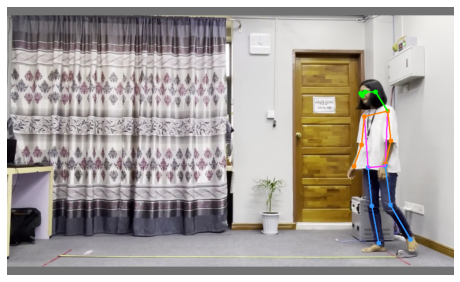

In [5]:
%matplotlib inline
plt.figure(figsize=(8,8))
plt.axis('off')
plt.imshow(nimg)
plt.show()

In [3]:
def predict(input_img):
    input_img = cv2.resize(input_img,(256,256))
    image = letterbox(input_img, 960, stride=64, auto=True)[0]
    image_ = image.copy()
    image = transforms.ToTensor()(image)
    image = torch.tensor(np.array([image.numpy()]))

    if torch.cuda.is_available():
        image = image.half().to(device)   
    #output, _ = model(image)

    output, _ = model(image)
    output = non_max_suppression_kpt(output, 0.25, 0.65, nc=model.yaml['nc'], nkpt=model.yaml['nkpt'], kpt_label=True)
    with torch.no_grad():
        output = output_to_keypoint(output)
    nimg = image[0].permute(1, 2, 0) * 255
    nimg = nimg.cpu().numpy().astype(np.uint8)
    nimg = cv2.cvtColor(nimg, cv2.COLOR_RGB2BGR)
    for idx in range(output.shape[0]):
        plot_skeleton_kpts(nimg, output[idx, 7:].T, 3)
    return nimg

In [4]:
path = r"E:\CloudSource\CloudSource_share\open_pose\dataset (created)\5_6_2022\720, mp4\chair-stand-test\side (45 degree)\normal\DS_006_002_003_075.mp4"
path = r"https://www.youtube.com/watch?v=qv87957vH7M"

path = r"https://www.youtube.com/watch?v=bDm8AuNhOWY"
vcapture = cv2.VideoCapture(path)
while True:
    rect,frame  = vcapture.read()
    
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    #frame =predict(frame)
    cv2.imshow("test",frame)
cv2.destroyAllWindows()

error: OpenCV(4.6.0) D:\a\opencv-python\opencv-python\opencv\modules\highgui\src\window.cpp:967: error: (-215:Assertion failed) size.width>0 && size.height>0 in function 'cv::imshow'
